In [1]:
#!usr/bin/python

""" Looks at the results from running the simulation at 3 species richness levels
    and at each of these levels, running the simulation 150 times with a changing 
    species composition at each iteration. Within these iterations, the biomasses 
    assigned to the species are also randomized to give 150 different biomass 
    distributions. This allows me to check if the species richness trend that 
    I found (increasing species richness = decreasing variance) is just an 
    artefact of the species IDs that I happened to choose in only one simulation
    or if this holds across 150 randomly selected species sets for each richness
    level. i.e. will the Levene's tests run for each simulation of different 
    species compositions at the 5 species richness level yield more non-sig
    results (i.e. variation more closely resembling that of the actual data) 
    compared to 10 and 20 species richness levels."""

__author__ = 'Katie Hindson (kah15@ic.ac.uk)'
__version__ = '0.0.1'
		
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
# Importing the results from running the levene's test for homogeneity of variance on the 150 simulations
# for each of the constant species richness numbers
species_5 = pd.read_csv("../Results/median_temps/lognormal_dist/levenes_test_results_5_species.csv")
species_10 = pd.read_csv("../Results/median_temps/lognormal_dist/levenes_test_results_10_species.csv")
species_20 = pd.read_csv("../Results/median_temps/lognormal_dist/levenes_test_results_20_species.csv")

In [3]:
# creating a new column that is a categorical variable that organizes teh levene's test results into a bin 
# of either 'non-significant', where p >= 0.05 (False) or 'significant', where p < 0.05 (True)
species_5['sig'] = list(species_5.p < 0.05)
species_10['sig'] = list(species_10.p < 0.05)
species_20['sig'] = list(species_20.p < 0.05)

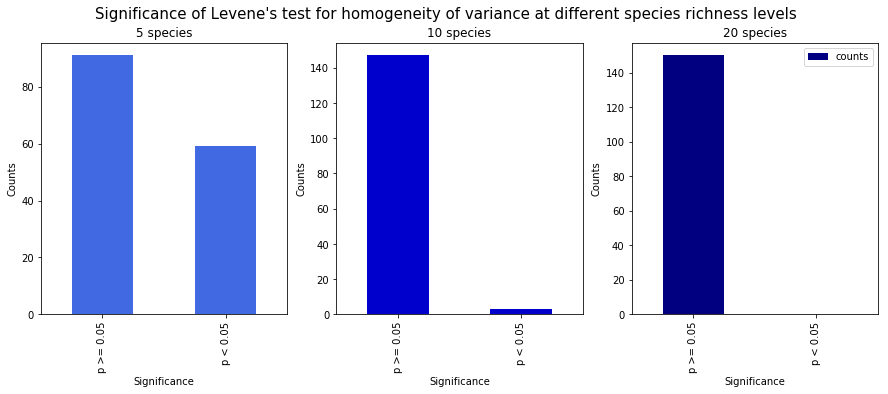

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex = True, figsize = (15, 5))

fig_5 = species_5.sig.value_counts()
fig_5.index = ['p >= 0.05', 'p < 0.05']

ax_5 = fig_5.plot(ax = axes[0],
                  kind = 'bar', 
                  title = "5 species", 
                  color = 'royalblue')
ax_5.set_xlabel('Significance')
ax_5.set_ylabel('Counts')

fig_10 = species_10.sig.value_counts()
fig_10.index = ['p >= 0.05', 'p < 0.05']

ax_10 = fig_10.plot(ax = axes[1],
                    kind = 'bar', 
                    title = "10 species", 
                    color = 'mediumblue')

ax_10.set_xlabel('Significance')
ax_10.set_ylabel('Counts')

fig_20 = species_20.sig.value_counts()
fig_20_new = pd.DataFrame({'counts' : [fig_20.values[0], 0]}, index = ['p >= 0.05', 'p < 0.05'])

ax_20 = fig_20_new.plot(ax = axes[2],
                        kind = 'bar', 
                        title = "20 species", 
                        color = 'navy')

ax_20.set_xlabel('Significance')
ax_20.set_ylabel('Counts')

fig.suptitle("Significance of Levene's test for homogeneity of variance at different species richness levels", 
            fontsize = 15)

## Running chisq test to see if the difference in significant vs. non-significant simulation scores for the levene's test is significant across species number levels

In [5]:
non_sig_5_10_20 = pd.DataFrame({'counts' : [fig_5.values[0], fig_10.values[0], fig_20.values[0]]}, 
                                index = ['5_species', '10_species', '20_species'])

chisq_results_5_10_20 = stats.chisquare(non_sig_5_10_20)

# yes, there is a significant difference across species richness levels
chisq_results_5_10_20

Power_divergenceResult(statistic=array([ 17.07731959]), pvalue=array([ 0.00019575]))